# 6. Applications: Satellite image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

## Looking at non-biology data

Most of this course focuses on biological data. To show the generality of the presented approaches, we show here short example based on satellite imagery.

Satellite imaging programs such as NASA's Landsat continuously image the earth and one can get retrieve data for free on several portals. We will deal here with images from a single region and use our basic image processing knowledge to do some vegetation analysis and image correction.

Let's first look at what a Landsat region data contains:

In [2]:
landsatfolder = 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/'

In [3]:
import glob

In [4]:
glob.glob(landsatfolder+'*tif')

['Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band3_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band5_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band1_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band4_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_ipflag_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_cloud_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band6_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_cfmask_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band2_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC201

The Landsat satellites acquires images in a series of wavelengths or "bands". Let us keep only those band files and sort them:

In [5]:
band_files = sorted(glob.glob(landsatfolder+'*band*tif'))
band_files

['Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band1_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band2_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band3_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band4_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band5_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band6_crop.tif',
 'Data/geography/landsat/LC80340322016205-SC20170127160728/crop/LC80340322016205LGN00_sr_band7_crop.tif']

Now we can import all images and stack them into a Numpy array:

In [6]:
list_images = [io.imread(x) for x in band_files]
image_stack = np.stack(list_images)
image_stack.shape

(7, 177, 246)

We see that we created an 3D array with the 7 different wavelength bands. Let's look at those:

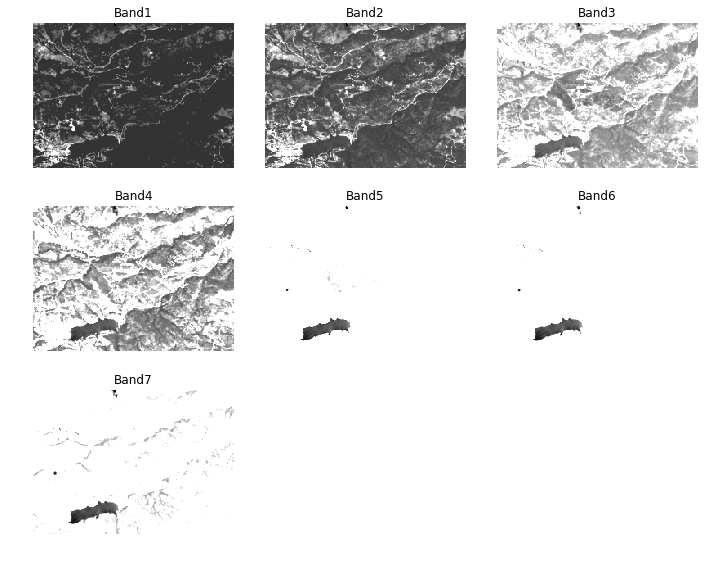

In [7]:
fig, axarr = plt.subplots(3,3, figsize = (10,8))
for i in range(9):
    if i<7:
        axarr[int(i/3),np.mod(i,3)].imshow(image_stack[i,:,:],cmap = 'gray', vmin=0, vmax = 500)
        axarr[int(i/3),np.mod(i,3)].set_title('Band'+str(i+1))
    axarr[int(i/3),np.mod(i,3)].axis('off')
    
fig.tight_layout(h_pad = 0, w_pad = 0)

From the Landsat information we know that bands 4,3 and 2 are RGB. So let's select those to create a natural image and try plotting it as RGB image:

In [8]:
image_stack.shape

(7, 177, 246)

In [9]:
image_RGB = image_stack[[3,2,1],:,:]

In [10]:
image_RGB.shape

(3, 177, 246)

In [13]:
# plt.imshow(image_RGB)
# plt.show()
# # TypeError: Invalid dimensions for image data

Oups, the dimensions are not correct:

In [14]:
image_RGB.shape

(3, 177, 246)

We created a stack where the leading dimension are the different bands. However in the RGB format, the different colors are the last dimension! So we have to move the first axis to the end to be able to plot it:

In [15]:
np.moveaxis(image_RGB,0,2).shape

(177, 246, 3)

In [41]:
# plt.imshow(np.moveaxis(image_RGB,0,2))
# plt.show()
# Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).

In [43]:
image_RGB

array([[[535, 597, 576, ..., 242, 279, 281],
        [483, 547, 549, ..., 283, 321, 364],
        [436, 424, 432, ..., 324, 399, 481],
        ...,
        [667, 832, 854, ..., 425, 413, 433],
        [985, 745, 764, ..., 372, 385, 397],
        [455, 415, 352, ..., 388, 380, 384]],

       [[514, 537, 525, ..., 311, 338, 364],
        [488, 516, 510, ..., 327, 354, 407],
        [484, 490, 463, ..., 364, 411, 477],
        ...,
        [594, 727, 701, ..., 403, 403, 409],
        [738, 662, 710, ..., 364, 401, 425],
        [429, 354, 277, ..., 353, 375, 413]],

       [[263, 300, 292, ..., 141, 158, 156],
        [238, 268, 275, ..., 148, 172, 176],
        [203, 208, 209, ..., 163, 172, 188],
        ...,
        [303, 429, 392, ..., 183, 172, 189],
        [443, 314, 410, ..., 169, 170, 179],
        [230, 188, 118, ..., 162, 164, 166]]], dtype=int16)

Next problem: the values of the pixels are not between 0-1 (floats) or 0-255 (ints). So we have to correct for that. We could do it manually, but skimage has some function to help us where we can say what should be the output scale:

In [18]:
from skimage.exposure import rescale_intensity

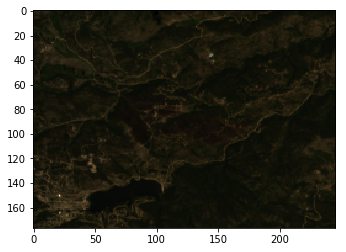

In [19]:
plt.imshow(rescale_intensity(np.moveaxis(image_RGB,0,2), out_range = (0,1)));

Now it starts looking like something reasonable. However the exposure is still not optimal. Let's clip values around the the dimmest and brightest pixels and pass that as an argument to the rescaling function:

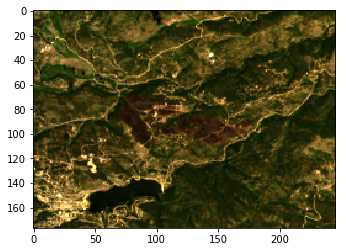

In [20]:
v_min, v_max = np.percentile(image_RGB, (0.2, 99.8))
plt.imshow(rescale_intensity(np.moveaxis(image_RGB,0,2),in_range=(v_min, v_max), out_range=(0,1)));

So that's much better. Note that we don't modify the image data. We just use the correcting functions within the plotting function. Indeed, we only want to improve the visual impression, not change the underlaying data.

Let us look at the images of the other day provided in the data for which we have the same bands:

In [21]:
landsatfolder = 'Data/geography/landsat/LC80340322016189-SC20170128091153/crop/'
band_files = sorted(glob.glob(landsatfolder+'*band*tif'))
band_files

['Data/geography/landsat/LC80340322016189-SC20170128091153/crop/LC80340322016189LGN00_sr_band1_crop.tif',
 'Data/geography/landsat/LC80340322016189-SC20170128091153/crop/LC80340322016189LGN00_sr_band2_crop.tif',
 'Data/geography/landsat/LC80340322016189-SC20170128091153/crop/LC80340322016189LGN00_sr_band3_crop.tif',
 'Data/geography/landsat/LC80340322016189-SC20170128091153/crop/LC80340322016189LGN00_sr_band4_crop.tif',
 'Data/geography/landsat/LC80340322016189-SC20170128091153/crop/LC80340322016189LGN00_sr_band5_crop.tif',
 'Data/geography/landsat/LC80340322016189-SC20170128091153/crop/LC80340322016189LGN00_sr_band6_crop.tif',
 'Data/geography/landsat/LC80340322016189-SC20170128091153/crop/LC80340322016189LGN00_sr_band7_crop.tif']

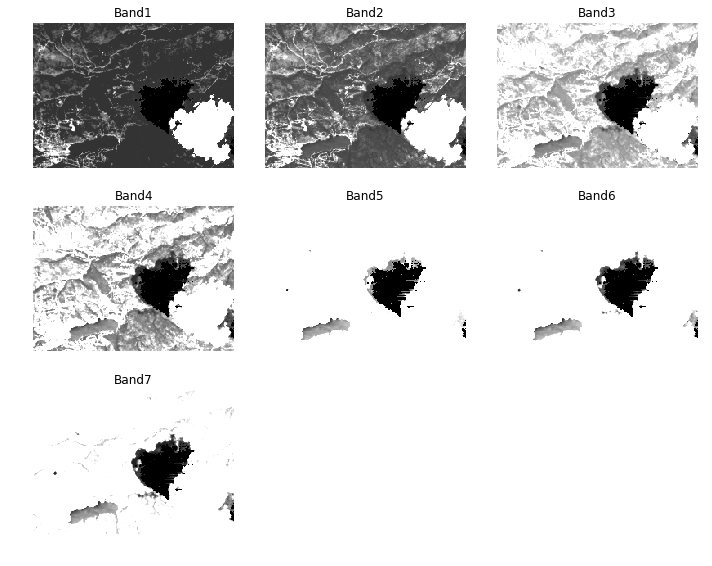

In [22]:
list_images = [io.imread(x) for x in band_files]
image_stack2 = np.stack(list_images)

fig, axarr = plt.subplots(3,3, figsize = (10,8))
for i in range(9):
    if i<7:
        axarr[int(i/3),np.mod(i,3)].imshow(image_stack2[i,:,:],cmap = 'gray', vmin=0, vmax = 500)
        axarr[int(i/3),np.mod(i,3)].set_title('Band'+str(i+1))
    axarr[int(i/3),np.mod(i,3)].axis('off')
    
fig.tight_layout(h_pad = 0, w_pad = 0)

We see that there is a cloud in the image. In addition the cloud is casting a shadow. If our goal was to compare the evolution of the vegetation between these two days, we would somehow have to remove those areas from our dataset. Let's first try to plot our image in real colors:

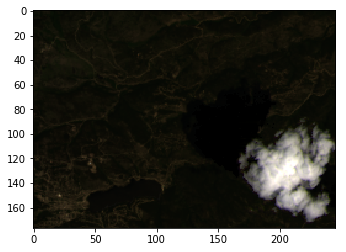

In [23]:
image_RGB = image_stack2[[3,2,1],:,:]
v_min, v_max = np.percentile(image_RGB, (0.2, 99.8))
plt.imshow(rescale_intensity(np.moveaxis(image_RGB,0,2).astype(float),in_range=(v_min, v_max),out_range=(0, 1)))
plt.show()

Because the cloud is so bright, the exposure in the rest of the image is really dim. We can manually clip the maximal values to be able to visualize our data:

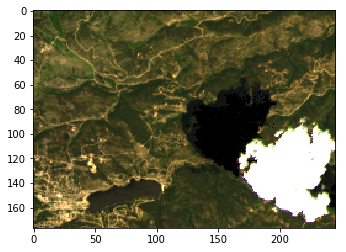

In [24]:
plt.imshow(rescale_intensity(np.moveaxis(image_RGB,0,2).astype(float),in_range=(v_min, 0.2*v_max),out_range=(0, 1)))
plt.show()

Now let us try to remove the cloud and it's shadow. Fortunately, we see that in band1 the clouds clearly appear as much brighter than the rest of the image. The histogram shows that most pixels are below ~1000. To avoid picking a value manually we can use the Otsu threshold and verify our mask

In [25]:
from skimage.filters import threshold_otsu

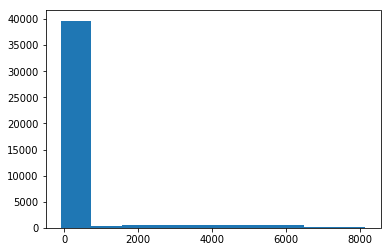

In [26]:
plt.hist(np.ravel(image_stack2[0,:,:]))#, bins = np.arange(0,20000,100))
plt.show()

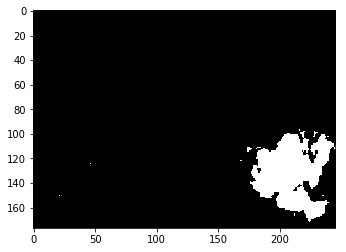

In [27]:
otsu_th = threshold_otsu(image_stack2[0,:,:])
plt.imshow(image_stack2[0,:,:]>otsu_th,cmap = 'gray')
plt.show()

The shadow on the other side, appears as a clear dark region in band 7. The histogram shows clearly that we have a set of pixels that have been clipped in the lower range. If we create a maks just above, we get:

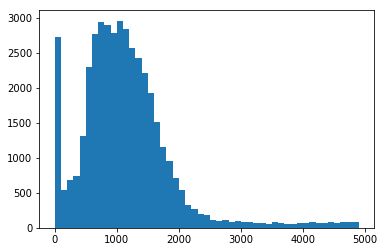

In [28]:
plt.hist(np.ravel(image_stack2[6,:,:]), bins = np.arange(0,5000,100))
plt.show()

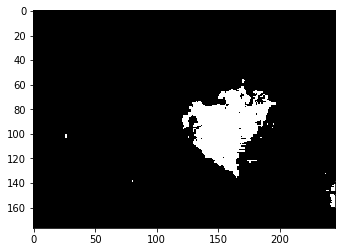

In [29]:
plt.imshow(image_stack2[6,:,:]<100,cmap = 'gray')
plt.show()

Now we have two masks that we can combine into one logical mask using Numpy logical operations

In [30]:
global_mask = (image_stack2[0,:,:]>otsu_th) | (image_stack2[6,:,:]<100)

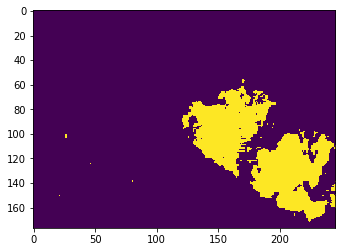

In [31]:
plt.imshow(global_mask)
plt.show()

We do in addition one round of binary closing/opening to close holes in our maks and remove small pixels:

In [32]:
from skimage.morphology import binary_closing, disk, binary_opening

In [33]:
global_mask = binary_opening(binary_closing(global_mask, selem=disk(5)),selem= disk(1))

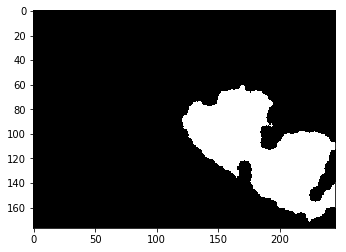

In [34]:
plt.imshow(global_mask, cmap = 'gray')
plt.show()

We can now apply the mask to our entire image stack, and use the fact that the 2D mask will be reproduced along the leading dimension of the stack

In [35]:
image_stack2_masked = image_stack2*~global_mask

Normally now we should be able to plot our RGB image without having to correct for the very bright cloud pixels: 

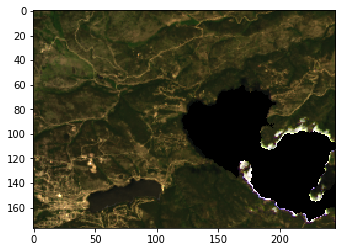

In [36]:
image_RGB = image_stack2_masked[[3,2,1],:,:]
v_min, v_max = np.percentile(image_RGB, (0.2, 99.8))
plt.imshow(rescale_intensity(np.moveaxis(image_RGB,0,2).astype(float),in_range=(v_min, v_max),out_range=(0, 1)));

## Calculating the effect of fire

By comparing two channels reflecting vegetation areas and burned/earth areas, we can estimate where fire caused dammage. One typical value that is measured is Band5-Band7/(Band5+Band7)

In [37]:
burn_day1 = (image_stack2_masked[4]-image_stack2_masked[6])/(image_stack2_masked[4]+image_stack2_masked[6])
burn_day2 = (image_stack[4]-image_stack[6])/(image_stack[4]+image_stack[6])
difference = burn_day1-burn_day2

# MZ: to compare the 2 images to see where it has burnt


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 1.0, 'Difference')

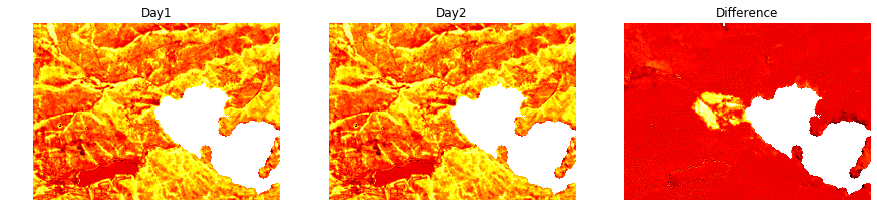

In [38]:
f, axarr = plt.subplots(1,3, figsize= (15,10))
axarr[0].imshow(burn_day1,cmap = 'hot')
axarr[0].axis('off')
axarr[0].set_title('Day1')
axarr[1].imshow(burn_day1,cmap = 'hot')
axarr[1].axis('off')
axarr[1].set_title('Day2')
axarr[2].imshow(difference,cmap = 'hot')
axarr[2].axis('off')
axarr[2].set_title('Difference')

/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


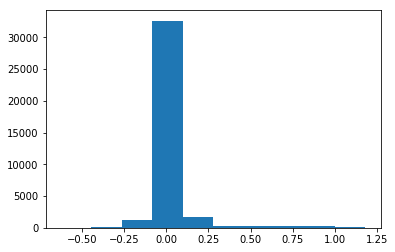

In [39]:
plt.hist(np.ravel(difference));

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


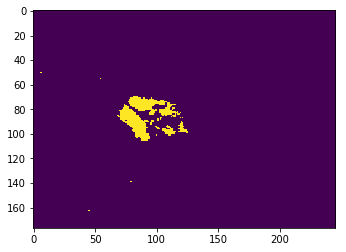

In [40]:
plt.imshow(difference>0.5)